## 2. Machine Learning for Regression


In [1]:
import pandas as pd
import numpy as np

## 2.2 Data preparation

In [2]:
# Read the data
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


We see that the column names are not consistent (case and naming convention). Therefore, we convert all columns to lowercase and separate multiple words in a column name with an underscore '_'.

In [3]:
# Normalize the columns
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

Let's do the same normalization for all other columns that have strings 

In [4]:
# Get all the columns having dtype = 'object' and store them in an array
string_columns = np.array(df.dtypes[df.dtypes=='object'].index)
string_columns

array(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size',
       'vehicle_style'], dtype=object)

In [5]:
# Perform the normalization
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [6]:
# Verify if it worked
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [7]:
# Check what other dtypes are present
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

## 2.3 Exploratory data analysis

In [8]:
# Check the no. of rows and columns
df.shape

(11914, 16)

In [9]:
df.make.unique()

array(['bmw', 'audi', 'fiat', 'mercedes-benz', 'chrysler', 'nissan',
       'volvo', 'mazda', 'mitsubishi', 'ferrari', 'alfa_romeo', 'toyota',
       'mclaren', 'maybach', 'pontiac', 'porsche', 'saab', 'gmc',
       'hyundai', 'plymouth', 'honda', 'oldsmobile', 'suzuki', 'ford',
       'cadillac', 'kia', 'bentley', 'chevrolet', 'dodge', 'lamborghini',
       'lincoln', 'subaru', 'volkswagen', 'spyker', 'buick', 'acura',
       'rolls-royce', 'maserati', 'lexus', 'aston_martin', 'land_rover',
       'lotus', 'infiniti', 'scion', 'genesis', 'hummer', 'tesla',
       'bugatti'], dtype=object)

There are 11914 rows and 16 columns

In [10]:
# Look at the first 5 unique values per column and the total number of unique values
for col in df.columns:
    print(f'Column: {col}\n')
    print(f'First 5 unique values: {df[col].unique()[:5]}\n')
    print(f'Total unique values: {df[col].nunique()}\n\n')


Column: make

First 5 unique values: ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']

Total unique values: 48


Column: model

First 5 unique values: ['1_series_m' '1_series' '100' '124_spider' '190-class']

Total unique values: 914


Column: year

First 5 unique values: [2011 2012 2013 1992 1993]

Total unique values: 28


Column: engine_fuel_type

First 5 unique values: ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']

Total unique values: 10


Column: engine_hp

First 5 unique values: [335. 300. 230. 320. 172.]

Total unique values: 356


Column: engine_cylinders

First 5 unique values: [ 6.  4.  5.  8. 12.]

Total unique values: 9


Column: transmission_type

First 5 unique values: ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']

Total unique values: 5


Column: driven_wheels

First 5 unique values: ['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']

Total unique 

In [11]:
# Get summary statistics of all the numeric columns
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


Distribution of price

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

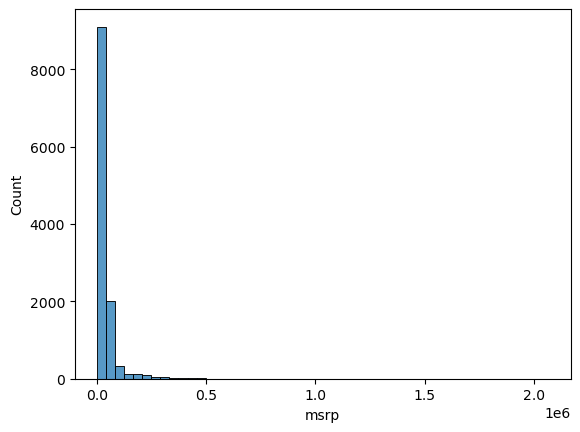

In [13]:
# Plot a histogram of the car prices
sns.histplot(df.msrp, bins=50)

We see that the distribution of prices is a 'Long Tail' distribution. This due to a small no. of extremely large prices in the data.

In [14]:
df['msrp'].describe()

count    1.191400e+04
mean     4.059474e+04
std      6.010910e+04
min      2.000000e+03
25%      2.100000e+04
50%      2.999500e+04
75%      4.223125e+04
max      2.065902e+06
Name: msrp, dtype: float64

From the summary statistics, the minimum car price is 2,000, maximum is 2.06 million and mean is around 40,600. <br><br>
Note: e+0x = 10<sup>x</sup> where x is an integer<br>
E.g. e+06 = 10<sup>6</sup> (1 million)   

In [15]:
print(f'{0.10:e}')

1.000000e-01


<AxesSubplot:xlabel='msrp', ylabel='Count'>

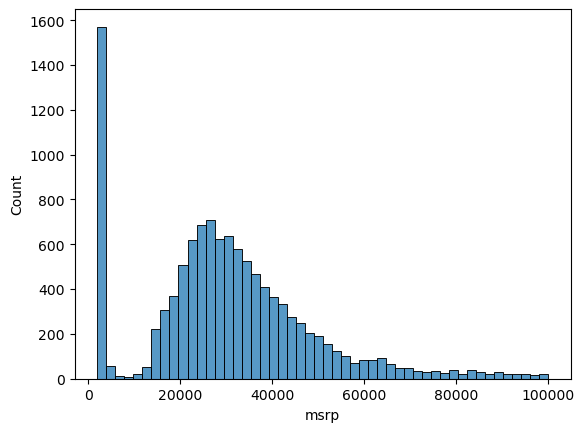

In [16]:
# Distribution of cars less than 100,000 (zooming into the left part of the graph)
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

We see a huge peak near 0 on the graph. We could explore this further by checking the most frequent msrp value (mode).

In [17]:
df['msrp'].mode()

0    2000
Name: msrp, dtype: int64

In [18]:
df['msrp'].value_counts().iloc[[0]]

2000    1036
Name: msrp, dtype: int64

The most frequent price is 2000 (appearing 1036 times) which is also the minimum price of a car in the data

### Further Analysis on Cheapest Cars

In [57]:
df_cheap = df[df['msrp'] == 2000]
df_cheap.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
17,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
18,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
19,audi,100,1992,regular_unleaded,172.0,6.0,automatic,all_wheel_drive,4.0,luxury,midsize,wagon,20,16,3105,2000
20,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
21,audi,100,1992,regular_unleaded,172.0,6.0,manual,all_wheel_drive,4.0,luxury,midsize,sedan,21,16,3105,2000


In [59]:
df_cheap['year'].value_counts()

1993    171
1992    161
1991    137
1994    134
1990    117
1995     91
1996     90
1997     68
1998     32
1999     20
2000     15
Name: year, dtype: int64

In [81]:
df_cheap['market_category'].fillna('Not Specified', inplace=True)

C:\Users\wesle\AppData\Local\Temp\ipykernel_12896\2039460636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cheap['market_category'].fillna('Not Specified', inplace=True)


In [83]:
df_cheap['market_category'].isna().sum()

0

In [85]:
df_cheap[df_cheap['market_category'].str.contains('luxury')].year.value_counts()

1991    31
1996    28
1992    27
1990    26
1993    25
1995    19
1997    19
1994    15
1998     5
Name: year, dtype: int64

### Back to the MSRP Column

We can dampen the effect of large msrp values on the distribution by applying a log transform to it. 

In [19]:
np.log1p([0, 1, 10, 100, 1000, 10000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
        9.21044037, 11.51293546])

Notice that as the value increases by 10, it's logarithm increases by about 2.3. Therefore, the log function can be used to downscale the data.

Note the `log1p` function is used to add 1 to the values. This is to handle the case if 0s appearing in the data (since log 0 is undefined).


In [20]:
np.log([0 + 1, 1+ 1, 10 + 1, 1000 + 1, 100000+1]) == np.log1p([0, 1, 10, 1000, 100000])

array([ True,  True,  True,  True,  True])

In [21]:
# Applying the log transform to msrp
price_logs = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

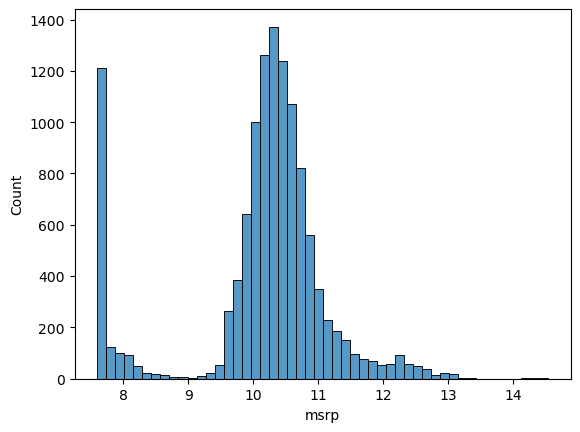

In [22]:
# Plot histogram over all prices
sns.histplot(price_logs, bins=50)

The log transform makes the distribution look approximately normally distributed

Missing values

In [23]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

We'll handle the missing values before training our model

## 2.4 Setting up the validation framework

Splitting the dataset into train,validation and test sets.

Training set: 60% of the data

Validation set: 20% of the data

Test set: 20% of the data

In [24]:
# No. of rows
n = len(df)

# Using percentages for all sets
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = int(n * 0.2)

total_size = n_val + n_test + n_train

In [25]:
n, n_train, n_val, n_test, total_size

(11914, 7148, 2382, 2382, 11912)

We see that when using percentages for all sets, the total size of our new sets is less than the original dataset.

A better approach would be to use the size remaining after subtracting the sizes for validation and test sets as the training set size.

In [26]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

total_size = n_val + n_test + n_train


In [27]:
n, n_train, n_val, n_test, total_size

(11914, 7150, 2382, 2382, 11914)

We see that the training set gets 2 more records (rows) than before

In [28]:
# We can select random indices from the dataset like this
df.iloc[[10, 0, 3, 5]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200


In [29]:
# Use slicing to select train, val and test sets
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [30]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


A problem with this approach is that the data isn't shuffled. This can cause some cars to be misrepresented among different sets.

E.g. BMW appears in training set but not validation set.

Therefore, it's a good idea to shuffle the data

In [31]:
# Indices to shuffle from 0 to n-1
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [32]:
np.random.seed(2)

# Randomly shuffling the indices
np.random.shuffle(idx)

idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [33]:
# Creating the different sets based on the shuffled indices
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [34]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [35]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [36]:
# Resetting the index and removing the index column that is added after calling reset_index 
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [37]:
# Applying the log transform to the msrp values in all sets and storing them in a separate variable
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [38]:
# Deleting the msrp column from our sets to prevent the model from learning the msrp values 
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [39]:
# Checking if the y values match the no. of rows in each set
len(y_train) == n_train, len(y_val) == n_val, len(y_test) == n_test

(True, True, True)

## 2.5 Linear regression

In [40]:
# Checking the 10th row (car)
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [41]:
# Hypothetical features for 1 car (row/sample)
xi = [453, 11, 86]

# Defining arbitrary bias 
w0 = 7.17

# Defining arbitrary weights 
w = [0.01, 0.04, 0.002]

In [42]:
# Linear regression for 1 sample
def linear_regression(xi):
    
    # No. of features
    n = len(xi)

    # Prediction is the bias term by default
    pred = w0

    # If there are any features, scale them by their weights and add to prediction
    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [43]:
linear_regression(xi)

12.312

In [44]:
# Since the resulting price is in the log + 1 scale, we convert it back using the exp function (expm1 for subtracting 1) 
np.expm1(12.312)

222347.2221101062

In [45]:
np.log1p(222347.2221101062)

12.312

## 2.6 Linear regression vector form

Linear regression can be expressed as a dot product between weights and feature values in vector form (plus the bias after the dot product) 

In [47]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [48]:
def linear_regression(xi):
    return w0 + dot(xi, w)

We can concatenate the bias to the weight vector, and assume that a feature value of 1 will be multiplied with it (since $w_0 * 1 = w_0$)

In [49]:
w_new = [w0] + w

In [50]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [51]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [52]:
linear_regression(xi)

12.312

In [53]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [54]:
# Our feature vectors will have 1 as the first value (to multiply with the bias)
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

# Composing X as a matrix of features of different cars
X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [55]:
def linear_regression(X):
    return X.dot(w_new)

In [56]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## 2.7 Training a linear regression model

In [53]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [54]:
# Creating as many 1s as there are rows
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [55]:
# Adding the 1s to the first column of each row
X = np.column_stack([ones, X])

In [56]:
# Defining the target vector
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

Finding the model weights using the Normal Equation: (X<sup>T</sup>X)<sup>-1</sup>X<sup>T</sup>y

In [57]:
# XTX is the Gram matrix which is a square matrix. This square matrix can almost always be inverted.
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [58]:
w0 = w_full[0]      # Bias
w = w_full[1:]      # Rest of the weights corresponding to each feature

In [59]:
w0, w

(25844.75405576683, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [60]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [61]:
train_linear_regression(X, y)

(2.0460143454602068e+20,
 array([1.26525728e+20, 8.71025484e+01, 2.59709297e+02, 0.00000000e+00]))

## 2.8 Car price baseline model

In [62]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [63]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [64]:
w0

7.9272573880700605

In [65]:
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

<AxesSubplot:ylabel='Count'>

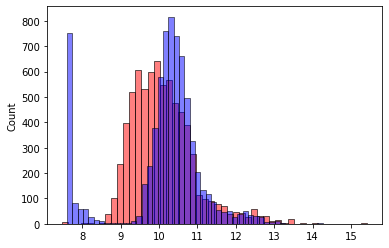

In [66]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)


## 2.9 RMSE

In [67]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [68]:
rmse(y_train, y_pred)

0.7554192603920132

## 2.10 Validating the model

In [69]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [70]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.7616530991301577

## 2.11 Simple feature engineering

In [71]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [72]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5172055461058291

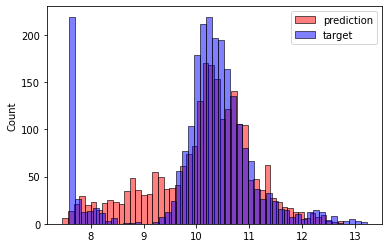

In [73]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

## 2.12 Categorical variables

In [74]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [75]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [76]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

266.5994263627081

In [77]:
w0, w

(3066759258862621.0,
 array([-7.90863204e-01,  1.80621909e+02,  1.97903973e+01,  1.46968041e+01,
        -3.39713455e-04,  7.74924546e+00,  9.76297867e+03,  9.83480038e+03,
         9.77003629e+03, -2.36936868e+01, -6.98582110e+00,  7.93435108e+01,
        -7.33167695e+01, -6.60897799e+00, -1.00310530e+01,  7.79383982e+01,
        -4.19367134e+01, -6.14213575e+01,  2.12412304e+02,  1.02166851e+03,
         9.08719092e+02,  9.84633740e+02,  1.06771237e+03,  7.00547494e+02,
        -3.06675926e+15, -3.06675926e+15, -3.06675926e+15, -3.06675926e+15,
         2.52356626e+00,  3.40712703e+00, -1.27416249e+01,  1.22844560e+01,
        -1.51620939e+01,  3.09315910e+02,  2.88692636e+02,  2.78158171e+02,
        -1.44115660e-01, -2.62579827e-02,  1.75913981e-01,  3.65037816e-01,
        -2.90235596e-01]))

## 2.13 Regilarization

In [78]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [79]:
y= [1, 2, 3, 1, 2, 3]

In [80]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [81]:
XTX_inv = np.linalg.inv(XTX)

In [82]:
XTX_inv

array([[ 3.85321698e-02,  1.20696663e+05, -1.20696696e+05],
       [ 1.20696640e+05, -2.74658839e+14,  2.74658839e+14],
       [-1.20696680e+05,  2.74658839e+14, -2.74658839e+14]])

In [83]:
XTX_inv.dot(X.T).dot(y)

array([ 6.24269892e-01,  3.44329390e+06, -3.44329299e+06])

In [84]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [85]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [86]:
XTX = XTX + 0.01 * np.eye(3)

In [87]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [88]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [89]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.4608208286209523

## 2.14 Tuning the model

In [90]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 3066759258862621.0 266.5994263627081
1e-05 6.6398149018651305 0.46081532123609276
0.0001 7.12965014007955 0.4608153659783837
0.001 7.13085491393288 0.46081585838957173
0.1 7.0002324128629025 0.4608736549134577
1 6.250747846974607 0.46158128382779856
10 4.7295125856710305 0.472609877266903


In [91]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.46081585838957173

## 2.15 Using the model

In [92]:
df_full_train = pd.concat([df_train, df_val])

In [93]:
df_full_train = df_full_train.reset_index(drop=True)

In [94]:
X_full_train = prepare_X(df_full_train)

In [95]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [96]:
y_full_train = np.concatenate([y_train, y_val])

In [97]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [98]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.4600753970266562

In [99]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [100]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [101]:
X_small = prepare_X(df_small)

In [102]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.63249250912739

In [103]:
np.expm1(y_pred)

41459.336786653585

In [104]:
np.expm1(y_test[20])

35000.00000000001

## 2.16 Next steps

* We included only 5 top features. What happens if we include 10?

Other projects

* Predict the price of a house - e.g. boston dataset
* https://archive.ics.uci.edu/ml/datasets.php?task=reg
* https://archive.ics.uci.edu/ml/datasets/Student+Performance

## 2.17 Summary

* EDA - looking at data, finding missing values
* Target variable distribution - long tail => bell shaped curve
* Validation framework: train/val/test split (helped us detect problems)
* Normal equation - not magic, but math
* Implemented it with numpy
* RMSE to validate our model
* Feature engineering: age, categorical features
* Regularization to fight numerical instability